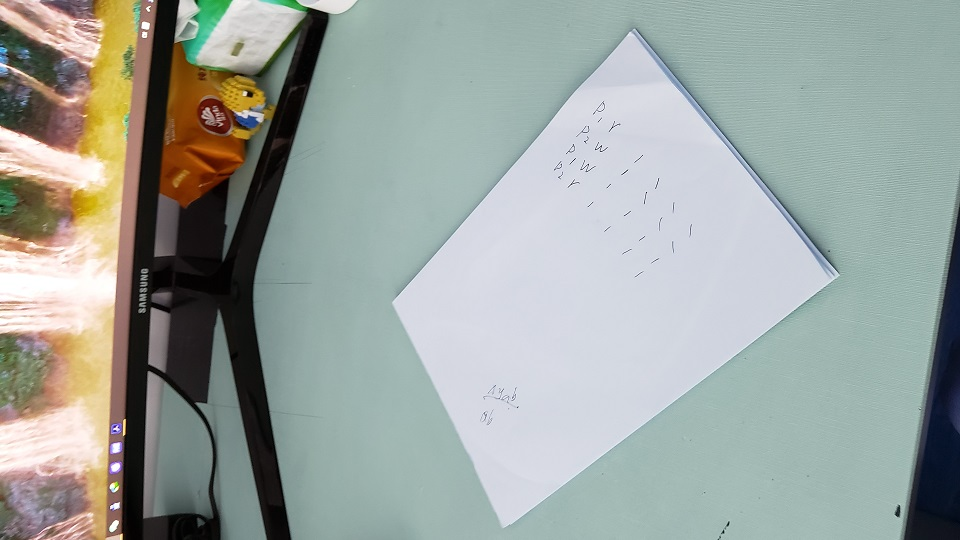

start
C


KeyboardInterrupt: 

In [19]:
from PIL import Image
import numpy as np
import cv2 as cv
from IPython.display import display
from pynq import Xlnk
from pynq import Overlay


ImgProjection_design = Overlay("./bitstream/ImgProjection.bit")
dma = ImgProjection_design.axi_dma_0
ImgProjection = ImgProjection_design.ImgProjection_0


image_path = "images/test.jpg"
original_image = cv.imread(image_path)

xlnk = Xlnk()
in_buffer = xlnk.cma_array(shape=(540,960,3), 
                           dtype=np.uint8)
out_buffer = xlnk.cma_array(shape=(540,960,3), 
                            dtype=np.uint8)

np.copyto(in_buffer,original_image)

outP=Image.fromarray(original_image)
display(outP)

ImgProjection.write(0x14, 540) 
ImgProjection.write(0x1c, 960) 
ImgProjection.write(0x24, 391) 
ImgProjection.write(0x2c, 505) 
ImgProjection.write(0x34, 836) 
ImgProjection.write(0x3c, 637) 
ImgProjection.write(0x44, 302) 
ImgProjection.write(0x4c, 526) 
ImgProjection.write(0x54, 273) 
ImgProjection.write(0x5c, 34) 


dma.sendchannel.transfer(in_buffer)
dma.recvchannel.transfer(out_buffer)    
ImgProjection.write(0x00,0x81) # start
print("start")
dma.sendchannel.wait()
print("C")
dma.recvchannel.wait()
print(out_buffer)

out_buffer.close()
xlnk.xlnk_reset()